# Arca Özkan 25524

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import reverse_geocoder as rg
from collections import Counter
from geopy.distance import geodesic

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join

d_path = "./data"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755


In [3]:
#Descriptive Statistics
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [4]:
#Adding District Columns
coordinatelist1 = list(zip(df.pickup_latitude, df.pickup_longitude))
districts1 = rg.search(coordinatelist1)
df['pickup_district'] = [p["name"] for p in districts1]

coordinatelist2 = list(zip(df.dropoff_latitude, df.dropoff_longitude))
districts2 = rg.search(coordinatelist2)
df['dropoff_district'] = [d["name"] for d in districts2]

df


Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


In [5]:
#Printing Top 5 Pickup and Dropoff Districts
print("Top 5 pickup districts:")
counter = Counter(df["pickup_district"])
for district, count in counter.most_common(5):
    print (district)
print("\nTop 5 dropoff districts:")
counter = Counter(df["dropoff_district"])
for district, count in counter.most_common(5):
    print (district)

Top 5 pickup districts:
Manhattan
New York City
Long Island City
Weehawken
The Bronx

Top 5 dropoff districts:
Manhattan
New York City
Long Island City
Weehawken
Brooklyn


In [6]:
#Adding Distance Column
coordinatelist1 = list(zip(df.pickup_latitude, df.pickup_longitude))
coordinatelist2 = list(zip(df.dropoff_latitude, df.dropoff_longitude))
distancelist=[]
for x in range(len(coordinatelist1)):
    pickupcoor=coordinatelist1[x]
    dropofcoor=coordinatelist2[x]
    distancelist.append(geodesic(pickupcoor, dropofcoor).miles)
    
df["distance"]=distancelist

In [7]:
#Adding Time of Day Column
def timeofday(time):
    time=time[11:]
    if 7 <= int(time[0:2]) < 9:
        return "rush_hour_morning"
    elif 9 <= int(time[0:2]) < 16:
        return "afternoon"
    elif  16 <= int(time[0:2]) < 18:
        return "rush_hour_evening"
    elif  18 <= int(time[0:2]) < 23:
        return "evening"
    elif  int(time[0:2]) < 7 or int(time[0:2]) >= 23:
        return "late_night"
df["time_of_day"] = df["pickup_datetime"].apply(timeofday)

df



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late_night


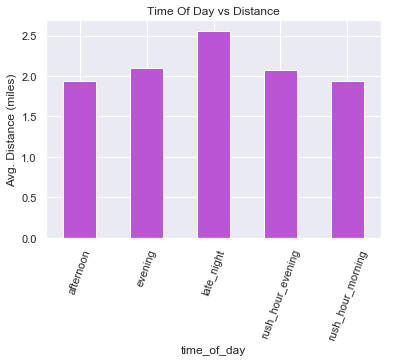

In [20]:
#Graphing Time of Day vs Distance
time_group = df.groupby(by="time_of_day")  
distanceavg = time_group["distance"].mean()

ax = distanceavg.plot(kind="bar",
                   color="mediumorchid",
                   rot=70)


plt.ylabel("Avg. Distance (miles)")
plt.title("Time Of Day vs Distance")
plt.show()

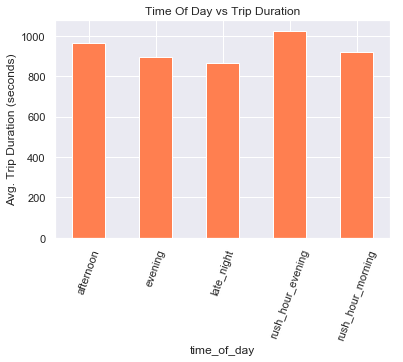

In [15]:
#Graphing Time of Day vs Trip Duration
time_group = df.groupby(by="time_of_day") 
durationavg = time_group["trip_duration"].mean()

ax = durationavg.plot(kind="bar",
                   color="coral",
                   rot=70)


plt.ylabel("Avg. Trip Duration (seconds)")
plt.title("Time Of Day vs Trip Duration")
plt.show()

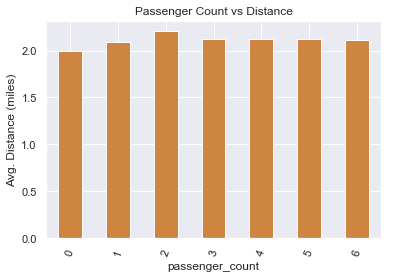

In [82]:
#Graphing Passenger Count vs Trip Duration
passenger_group = df.groupby(by="passenger_count") 
distanceavg = passenger_group["distance"].mean()

ax = distanceavg.plot(kind="bar",
                   color="peru",
                   rot=70)


plt.ylabel("Avg. Distance (miles)")
plt.title("Passenger Count vs Distance")
plt.show()

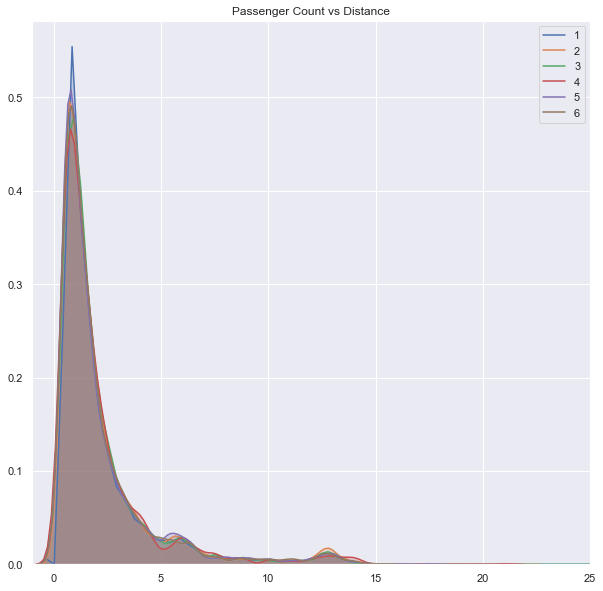

In [73]:
#Graphing Passenger Count vs Distance
one = df[df["passenger_count"] == 1]["distance"]
two = df[df["passenger_count"] == 2]["distance"]
three = df[df["passenger_count"] == 3]["distance"]
four = df[df["passenger_count"] == 4]["distance"]
five = df[df["passenger_count"] == 5]["distance"]
six = df[df["passenger_count"] == 6]["distance"]

fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.kdeplot(one, shade=True, ax=ax, label="1")
sns.kdeplot(two, shade=True, ax=ax, label="2")
sns.kdeplot(three, shade=True, ax=ax, label="3")
sns.kdeplot(four, shade=True, ax=ax, label="4")
sns.kdeplot(five, shade=True, ax=ax, label="5")
sns.kdeplot(six, shade=True, ax=ax, label="6")

plt.xlim([-1, 25])
plt.title("Passenger Count vs Distance")
plt.show()

In [68]:
#ANOVA
stats.f_oneway(one, two, three,four,five,six)
#since p value is less than 0.05, we can reject the null hypothesis. So, we can say that passenger size effects distance.

F_onewayResult(statistic=7.283096305101685, pvalue=7.86179334693054e-07)

In [42]:
def weekendfinder(date):
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    if datetime.strftime(date, '%A')=="Saturday" or datetime.strftime(date, '%A')=="Sunday":
        return "Weekend"
    else:
        return "Weekday"
df["weekend_or_weekday"] = df["pickup_datetime"].apply(weekendfinder)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,weekend or weekday,weekend_or_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening,Weekday,Weekday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,Weekday,Weekday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning,Weekday,Weekday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,Weekday,Weekday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,Weekday,Weekday
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening,Weekend,Weekend
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening,Weekday,Weekday
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon,Weekday,Weekday
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening,Weekday,Weekday
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late_night,Weekday,Weekday


In [47]:
#2 Sample t-test
test_type = "distance"

weekdays = df[df["weekend_or_weekday"] == "Weekday"][test_type]  
weekends = df[df["weekend_or_weekday"] == "Weekend"][test_type] 
stats.ttest_ind(weekdays, weekends, equal_var=False)
# Since the p value for the 2 sample t-test is less than 0.05, we can reject the null hypothesis of 
# "The day of the week has no effect on the distance". So there is a significant difference in
# means of distances travelled in weekends and weekdays.

Ttest_indResult(statistic=-5.604877366928616, pvalue=2.0924144330692153e-08)

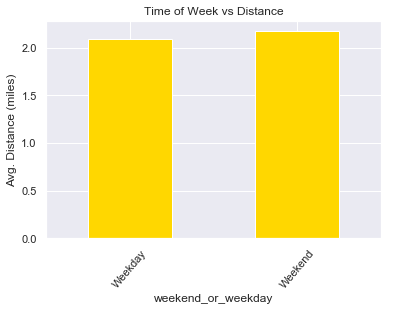

In [83]:
#Graphing Time of Week vs Distance
time_group = df.groupby(by="weekend_or_weekday")
distanceavg = time_group["distance"].mean()

ax = distanceavg.plot(kind="bar",
                   color="gold",
                   rot=50)


plt.ylabel("Avg. Distance (miles)")
plt.title("Time of Week vs Distance")
plt.show()